In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

### Load data and split into training data and validation data

In [2]:
feature = pd.read_csv('https://raw.githubusercontent.com/BolunDai0216/nyuMLSummerSchool/master/day05/fish_market_feature.csv')
label = pd.read_csv('https://raw.githubusercontent.com/BolunDai0216/nyuMLSummerSchool/master/day05/fish_market_label.csv')
X_train, X_val, y_train, y_val = train_test_split(feature.values, label.values, test_size=0.1, random_state=3)

### Build Model

1) Define a model of three dense layers with ReLu activation functions. The output of the two first layers should have 300 neurons. 

2) Train the model for 2000 epochs with a batch size of 64 and a mean squared error loss.


In [3]:
model = Sequential([
    Dense(300, activation='relu', input_shape=(5,)),
    Dense(300, activation='relu'),
    Dense(1, activation='relu')
])

model.compile(
    optimizer='Adam',
    loss='mean_squared_error',
    metrics=['mae']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               1800      
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 301       
Total params: 92,401
Trainable params: 92,401
Non-trainable params: 0
_________________________________________________________________


In [4]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/1000
2/2 [==============================] - 0s 91ms/step - loss: 268963.1562 - mae: 393.4099 - val_loss: 165662.5000 - val_mae: 303.7520
Epoch 2/1000
2/2 [==============================] - 0s 20ms/step - loss: 258172.1406 - mae: 382.8036 - val_loss: 158312.7656 - val_mae: 294.0253
Epoch 3/1000
2/2 [==============================] - 0s 19ms/step - loss: 248593.7812 - mae: 373.2669 - val_loss: 151375.8438 - val_mae: 284.5749
Epoch 4/1000
2/2 [==============================] - 0s 19ms/step - loss: 239382.1250 - mae: 364.1399 - val_loss: 144428.6875 - val_mae: 274.8319
Epoch 5/1000
2/2 [==============================] - 0s 21ms/step - loss: 229903.9062 - mae: 354.8844 - val_loss: 137107.0938 - val_mae: 264.2243
Epoch 6/1000
2/2 [==============================] - 0s 19ms/step - loss: 220078.8281 - mae: 344.8407 - val_loss: 129233.2969 - val_mae: 252.3949
Epoch 7/1000
2/2 [==============================] - 0s 20ms/step - loss: 208867.3125 - mae: 333.6573 - val_loss: 120791.8047 - val

### Load the testing dataset

In [5]:
X_test = pd.read_csv('https://raw.githubusercontent.com/BolunDai0216/nyuMLSummerSchool/master/day05/fish_market_test_feature.csv').values
y_test = pd.read_csv('https://raw.githubusercontent.com/BolunDai0216/nyuMLSummerSchool/master/day05/fish_market_test_label.csv').values


# Predict the corresponding y_hat value of the test dataset
y_hat = model.predict(X_test)

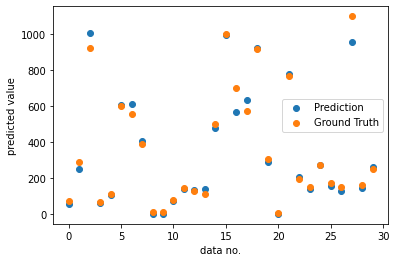

In [6]:
plt.figure()
plt.scatter(np.arange(y_hat.shape[0]), y_hat, label='Prediction')
plt.scatter(np.arange(y_test.shape[0]), y_test, label='Ground Truth')
plt.legend()
plt.xlabel('data no.')
plt.ylabel('predicted value')
plt.show()